# HR Analytics Project (Evaluation Project - 3)
Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

Downlaod Files:
    
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, plot_roc_curve

warnings.filterwarnings('ignore')




# Importing Dataset

In [2]:
data = pd.read_csv("HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Observation:- 

    This Dataset is consist of 1470 rows and 35 columns

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Observation:-
           
 This dataset consist of both categorical and numerical data. 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Observation:-
    
Columns like 'Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' are ordinal variable.

Target variable is 'Attrition'.

It is a Classification problem.

In [7]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [8]:
# Checking unique values in columns
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Each column contains unique values.

# Checking Null Values

In [9]:
n_val= data.isna().sum()
n_val

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

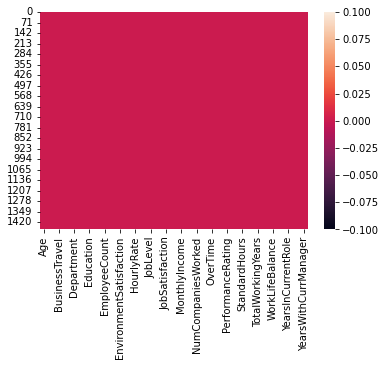

In [10]:
sns.heatmap(data.isnull())

Observations:-

    As we can see there no null value presnt in dataset.

In [11]:
# checking duplicate 

data.duplicated().sum()

0

No duplicate rows present in dataset.


# Statistical Summary

In [12]:
# Checking Statistical Summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0



Observations:-  

Mean value is more than the median value in many columns that means they are  Right skewed.

The range of age of the employee is between 18 to 60 and most of the employees are of 36.

In some columns median value  is more than the mean value which means they are left skewed.

Outliers are present in whole dataset.

Standard Hours and Std has fixed value (0) for all.

# Spliting Numerical and Categorical columns

In [13]:
# numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [14]:
# Categorical Columns
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']


In [15]:
# Unique values for all features, and unique values of categorical variables
for col in data:
    print(col,':\n',data[col].value_counts())
    print('*****************************************')

Age :
 35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
*****************************************
Attrition :
 No     1233
Yes     237
Name: Attrition, dtype: int64
*****************************************
BusinessTravel :
 Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
*****************************************
DailyRate :
 691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
*****************************************
Department :
 Research & Development    961
Sales 

 Columns like EmployeeCount, Over18, StadardHours have single unique values so we can consider them for analysis, ID of employee is employee number so we can be removed it.

# Droping columns

In [16]:
# Removing unwanted columns
data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours','EmployeeNumber'], inplace=True)
data.shape

(1470, 31)

# Data loss
Before we have 1470 rows and 35 columns but now we have 1470 rows and 31 columns.

In [17]:
#  Column Attrition (Target variable)
data["Attrition"]. unique()

array(['Yes', 'No'], dtype=object)

# Encoding Target 

In [18]:
# Using Label Encoder on target variable

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Attrition"] = le.fit_transform(data["Attrition"])
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8
1469,34,0,Travel_Rarely,628,Research & Development,8,3,Medical,2,Male,...,3,1,0,6,3,4,4,3,1,2


In [19]:
data['Attrition'].value_counts()
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [20]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

# Exploratory Data Analysis

# Visualization Analysis

Univariate Analysis

0    1233
1     237
Name: Attrition, dtype: int64


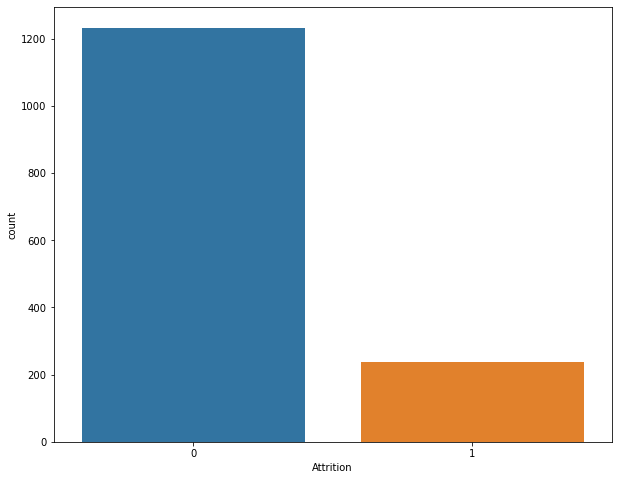

In [21]:
# Employees stayed and left the company
print(data["Attrition"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(data["Attrition"])
plt.show()

We can see that count of Yes is less compare to No. Here only few employees are facing the attrition and the data is highly imbalanced.

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


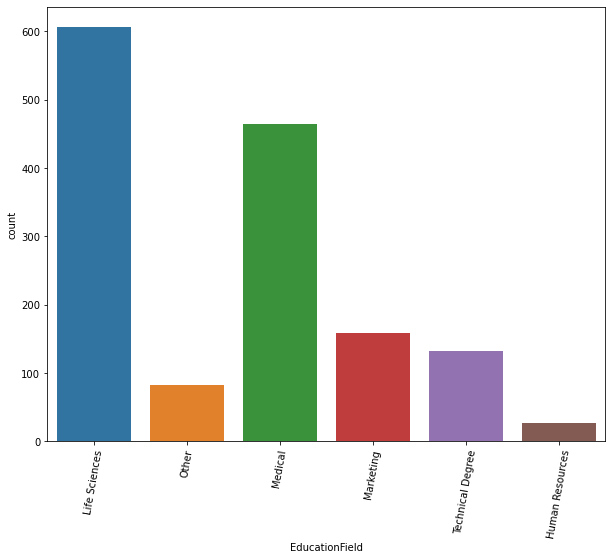

In [22]:
# Educational fied of the employees
print(data["EducationField"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(data["EducationField"])
plt.xticks(rotation=80)
plt.show()

Every employee is from different educational background.Maximum are from Medical background and only few are from Human Resources field.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


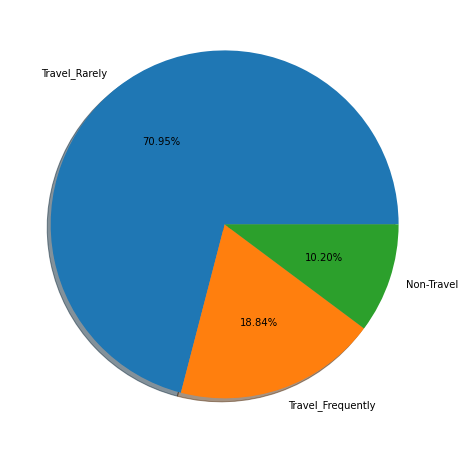

In [23]:
#  Basis of BusinessTravel
print(data["BusinessTravel"].value_counts())
labels='Travel_Rarely','Travel_Frequently','Non-Travel '
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['BusinessTravel'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The employees travel rarely but few travels frequently.

Male      882
Female    588
Name: Gender, dtype: int64


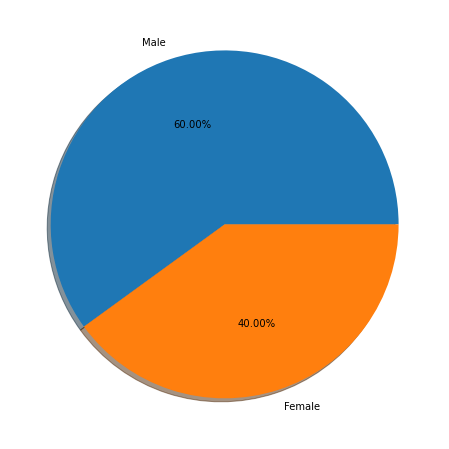

In [24]:
# Gender
print(data['Gender'].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

Male employees are facing the attrition than the female employees.

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64


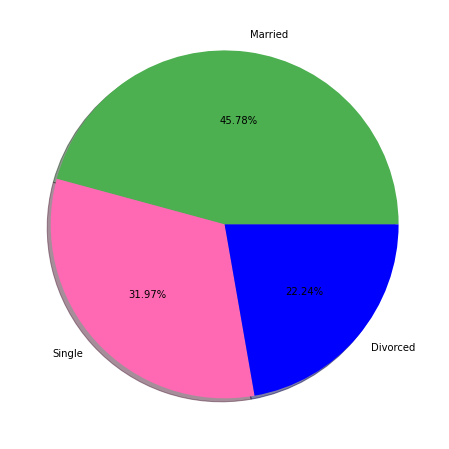

In [25]:
# Marital status of the employees
print(data["MaritalStatus"].value_counts())
labels='Married','Single','Divorced '
colors = ["#4CAF50", "hotpink", "b"]
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(data['MaritalStatus'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.show()

 There are 45.78% of employees who are married and 31.97% employees are single and 22.24% of the employees in the organization are divorced. So married employees are more in the company.

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64


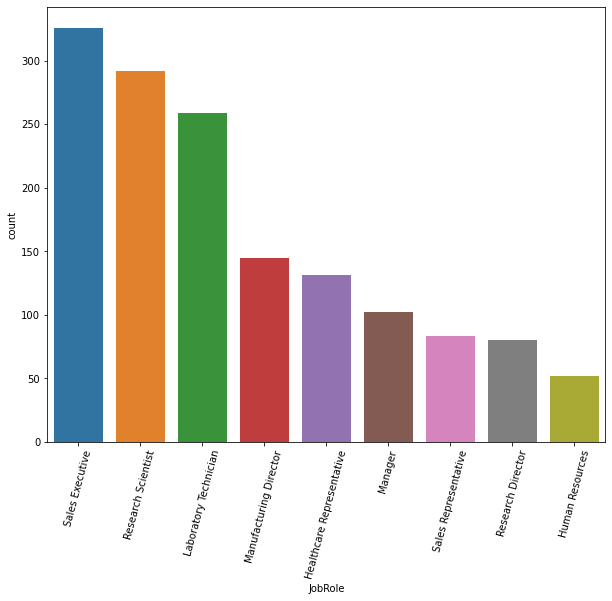

In [26]:
# JobRole of the employees
print(data["JobRole"].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(data["JobRole"])
plt.xticks(rotation=75)
plt.show()

 There are different job roles here, Sales Executive jobs are more,Research Scientist and Laboratory Technician. Human Resources job roles are very less in numbers.

No     1054
Yes     416
Name: OverTime, dtype: int64


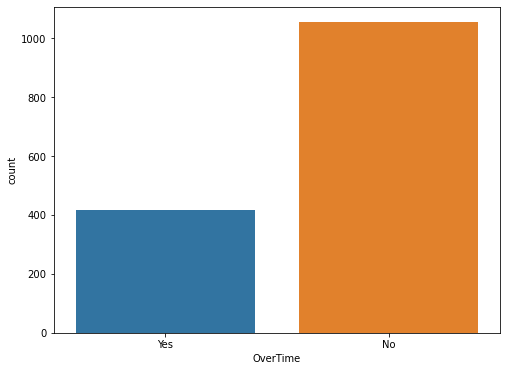

In [27]:
# Overtime of the employees
print(data["OverTime"].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(data["OverTime"])
plt.show()

employees not doing overtime is high in counts.

In [28]:
# Numeric columns
numeric=[ 'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


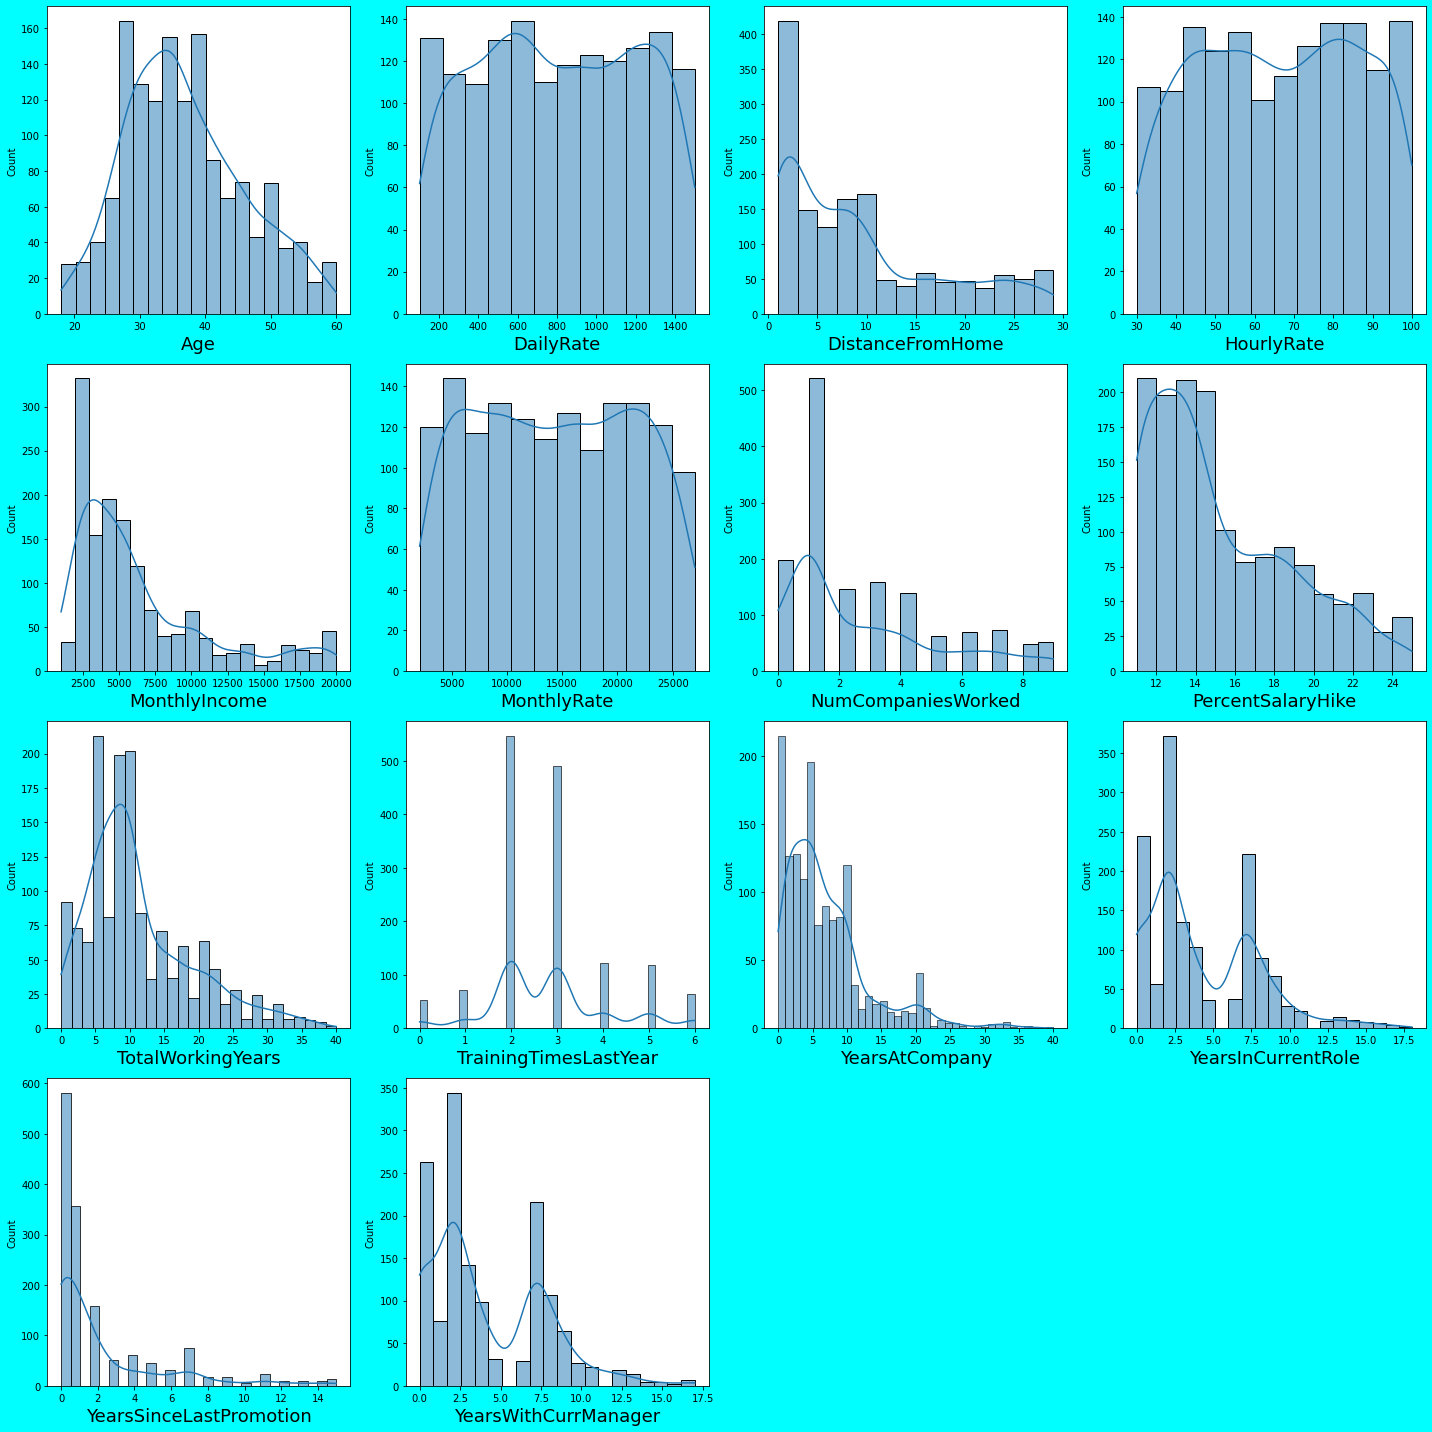

In [29]:
plt.figure(figsize=(20,20),facecolor='cyan' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4, plno)
        sns.histplot(data[x], kde= True)
        plt.xlabel (x, fontsize= 18)
    plno +=1
plt.tight_layout()

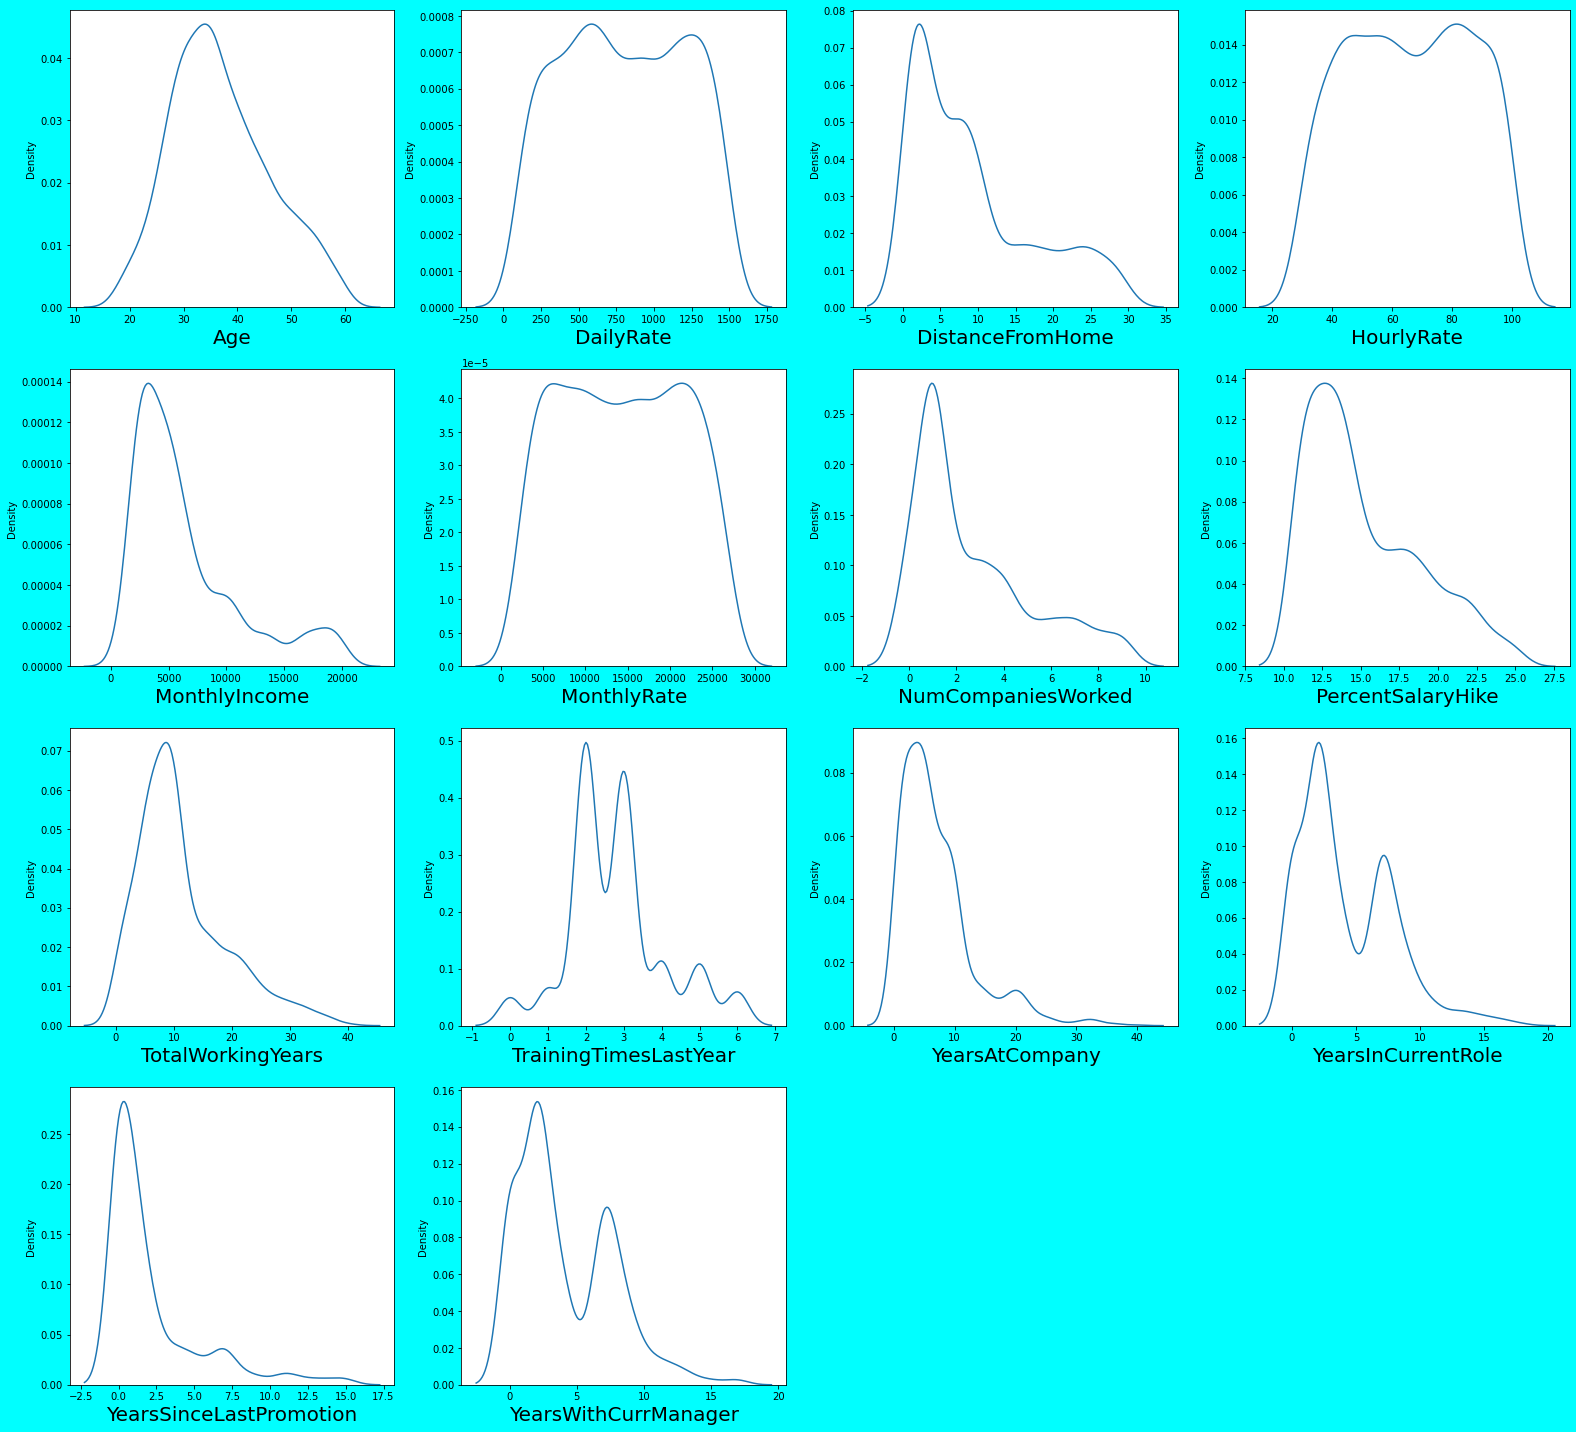

In [30]:
plt.figure(figsize=(22,20),facecolor='cyan' )
plno=1
for x in numeric:
    if plno<=14:
        plt.subplot(4,4,plno)
        sns.distplot(data[x], hist=False)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

Range of Employee age is between 30-40.
most employees are working since long like more than 10 years.
Employee staying after promotion.
range of hourly raye in between 40-80.
Employee are train 2-3 times.
outliers are present in some cols
Employee stay in same role for maximum 4 yrs.

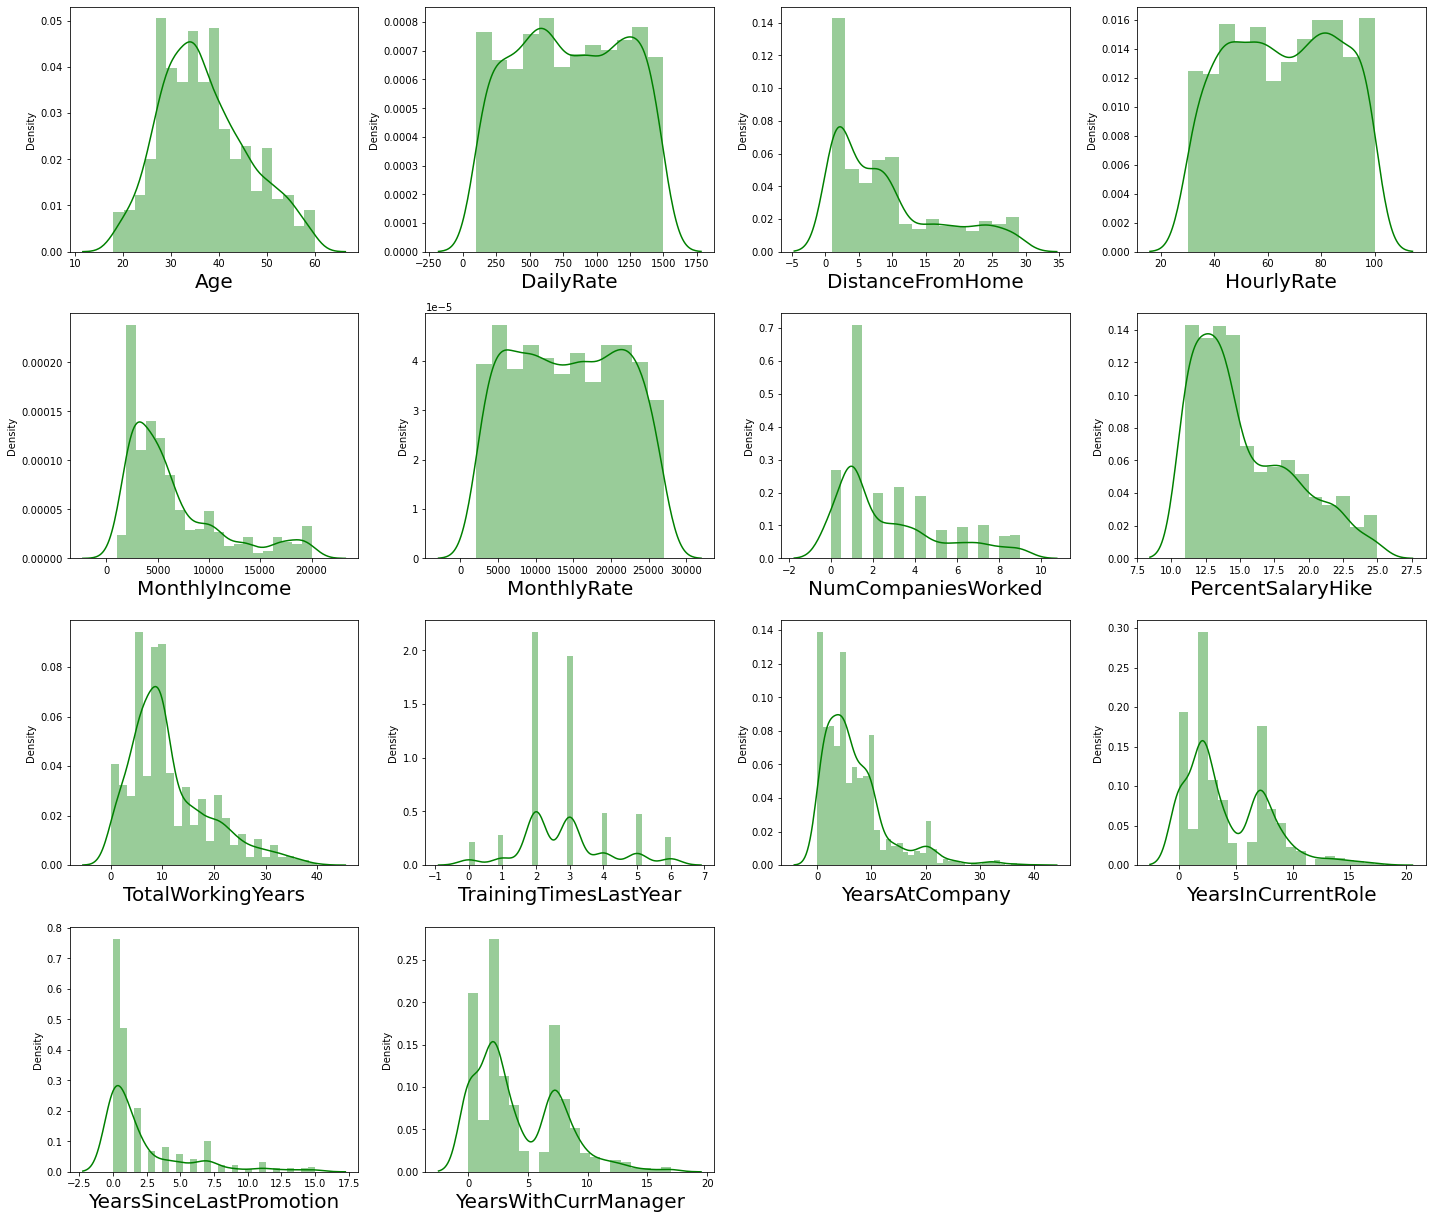

In [31]:
# Checking Skewness in Numerical columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numeric:
    if plotnumber<=24:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column],color="green")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There is no skewness in Age column.
The columns DailyRate, HourlyRate and MonthlyRate are almost normally distributed with no skewness.
Rest of all columns have some skewness.

# Bivariate Analysis

# Checking Relation of each attributes with various labels

<AxesSubplot:xlabel='Attrition', ylabel='count'>

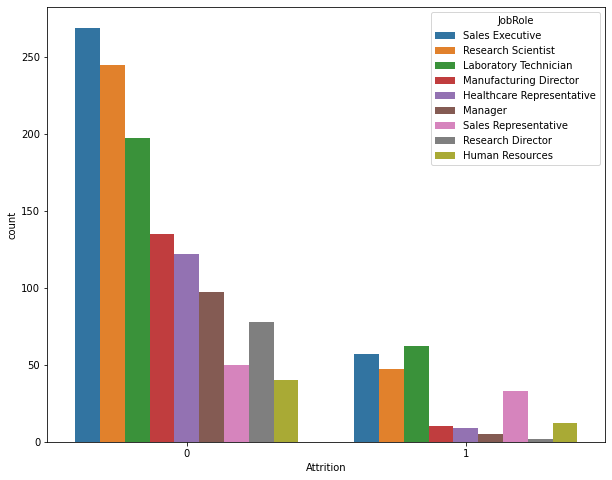

In [32]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='JobRole', data=data,)

Attrition is high in Sales executive and Labarotary technicians.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

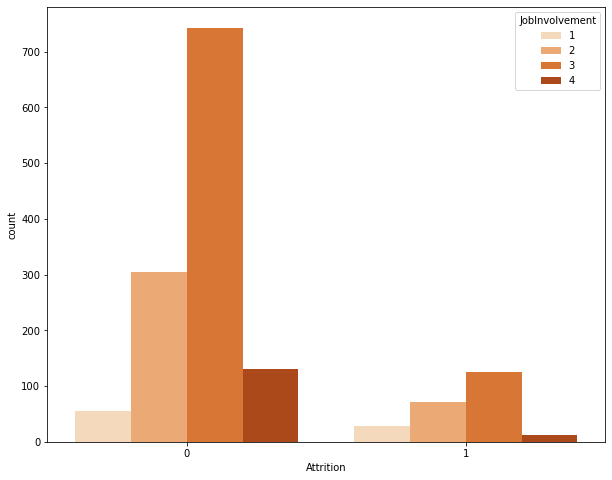

In [33]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='JobInvolvement', data=data,palette='Oranges')

Attrition is spread over Job Involvment, the records with value of 3 has high attrition

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

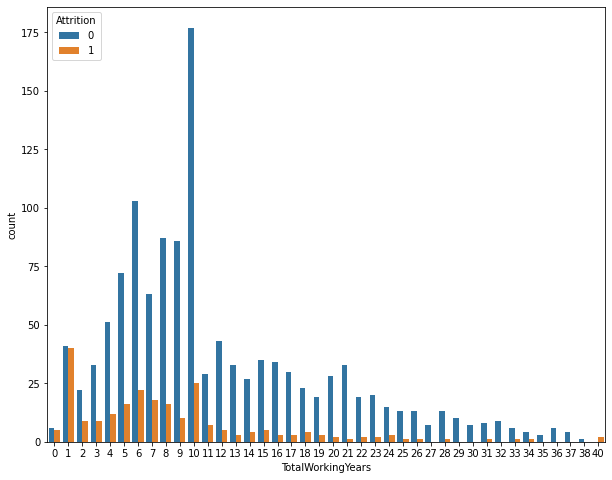

In [34]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='TotalWorkingYears', hue='Attrition', data=data,)

Highest level of Attrition is in Human Resourecs department.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

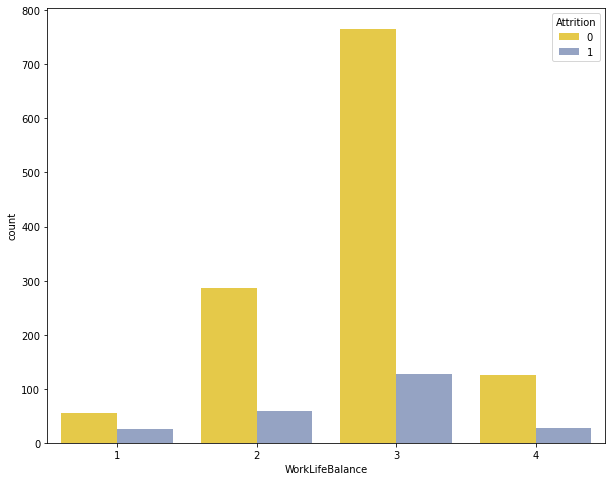

In [35]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data,palette='Set2_r')


<AxesSubplot:xlabel='Attrition', ylabel='count'>

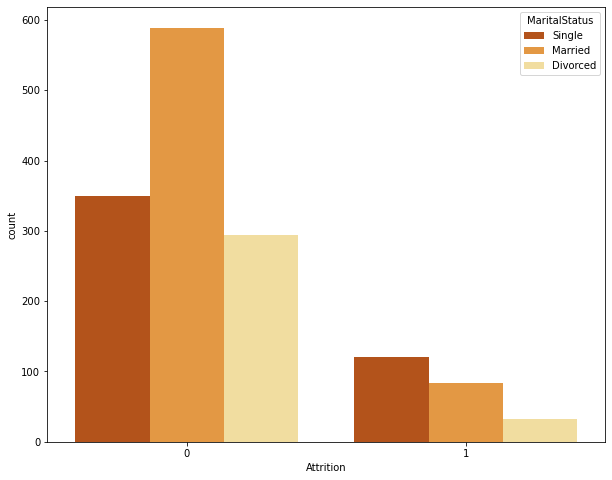

In [36]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='MaritalStatus', data=data,palette='YlOrBr_r')

 Singles are the most people who left the jobs than compared to that of married/ divorce

<AxesSubplot:xlabel='Attrition', ylabel='count'>

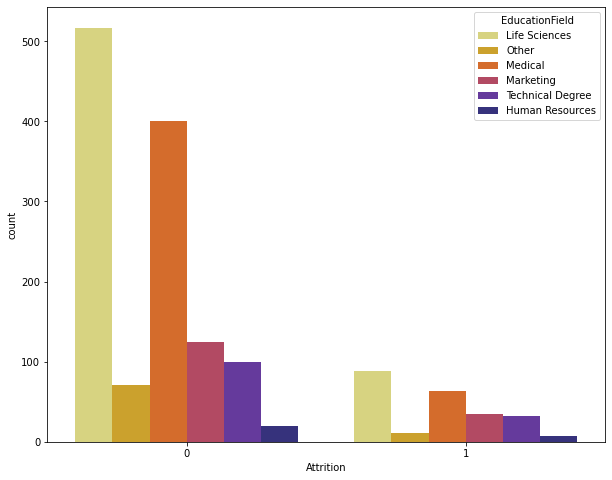

In [37]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition', hue='EducationField', data=data,palette='CMRmap_r')


<AxesSubplot:xlabel='MonthlyIncome'>

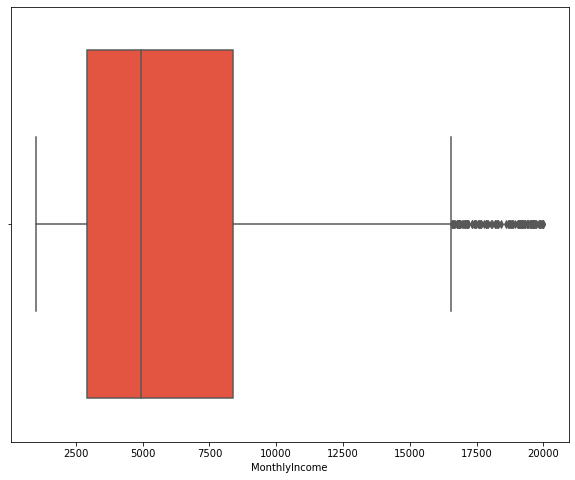

In [38]:
plt.figure(figsize=(10,8), facecolor='white')
sns.boxplot(x='MonthlyIncome', data=data,palette='CMRmap')

Average salary range is 3000 to 10000, there are some outliers who's salary is high.

<AxesSubplot:xlabel='OverTime', ylabel='count'>

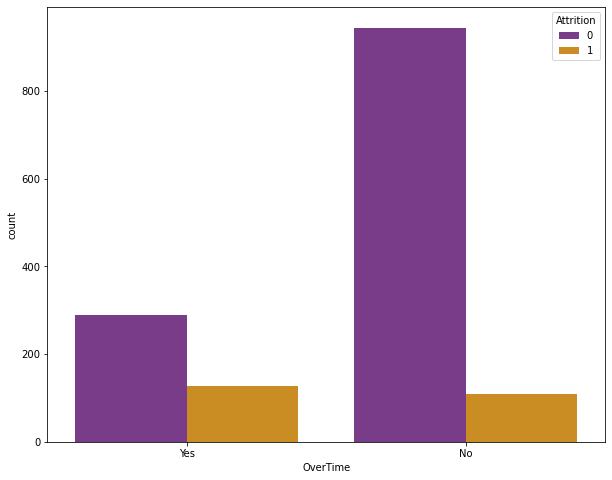

In [39]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='OverTime',hue='Attrition',data=data,palette='CMRmap')

Who does overtime left jobs easily than those who doesnot worked for overtime.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

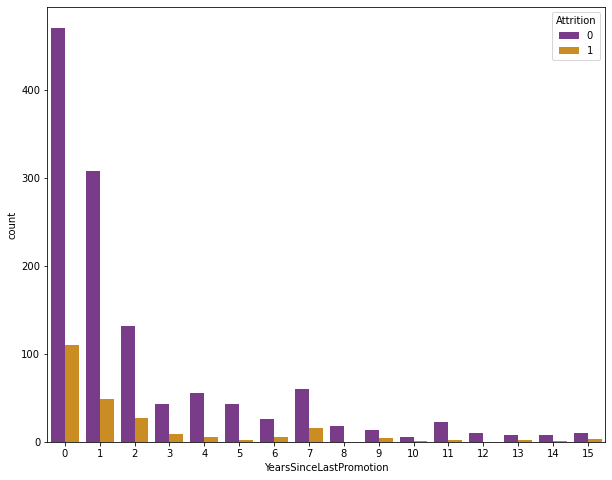

In [40]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition',data=data,palette='CMRmap')

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

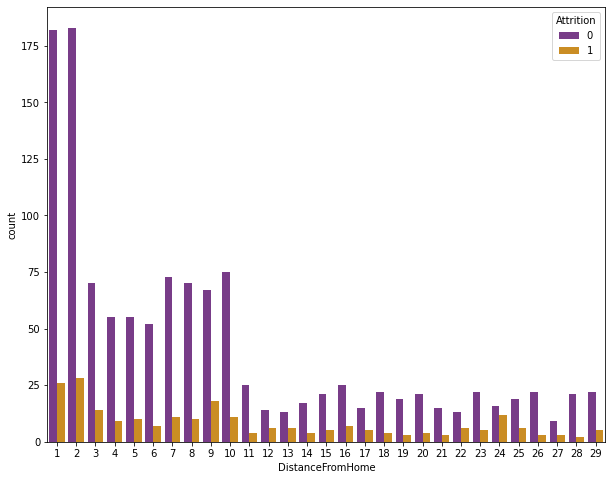

In [41]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='DistanceFromHome',hue='Attrition',data=data,palette='CMRmap')

Those who live near to job location does job for longer period.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

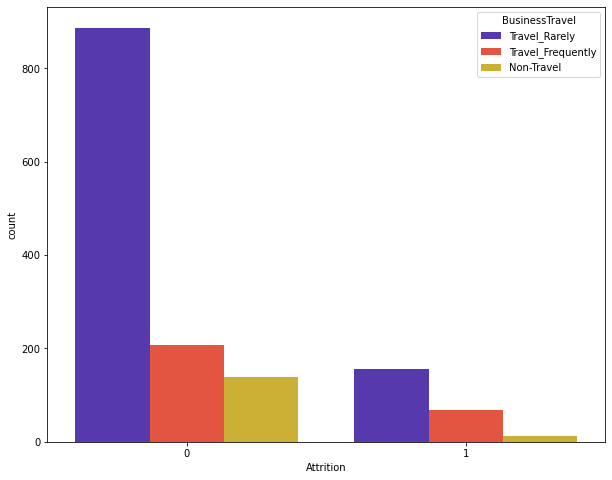

In [42]:
plt.figure(figsize=(10,8), facecolor='white')
sns.countplot(x='Attrition',hue='BusinessTravel',data=data,palette='CMRmap')


<Figure size 720x576 with 0 Axes>

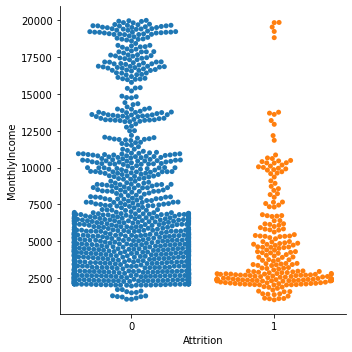

In [43]:
plt.figure(figsize=(10,8), facecolor='white')
sns.catplot(x= 'Attrition', y= 'MonthlyIncome',data = data,kind = 'swarm')


Those who stay for longer period have more monthly salary than who left early.

<Figure size 720x576 with 0 Axes>

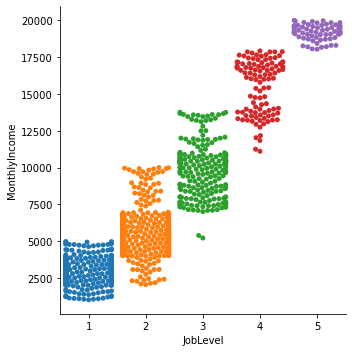

In [44]:
plt.figure(figsize=(10,8), facecolor='white')
sns.catplot(y= 'MonthlyIncome', x= 'JobLevel',data = data,kind = 'swarm')

As the position is high salary is also high.

<Figure size 1080x432 with 0 Axes>

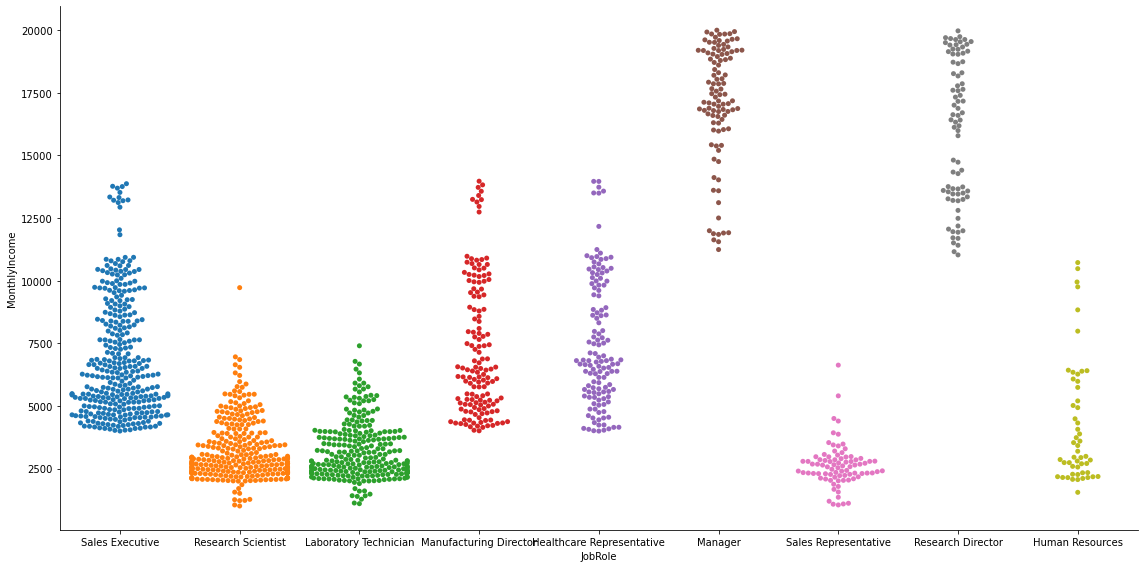

In [45]:
plt.figure(figsize=(15,6), facecolor='white')
sns.catplot(data = data, x = 'JobRole', y = 'MonthlyIncome',kind = 'swarm', aspect = 2, height=8)
plt.show()

Average Salary range of Sales executive is between 5k-10k, research scientist has average salary range of 2.5k to 5k per month,also same goes for Labarotary technician, Manufacturing Director gets 6k -10k average salary, Manager gets approx 15k- 20k average salary.

<Figure size 1080x432 with 0 Axes>

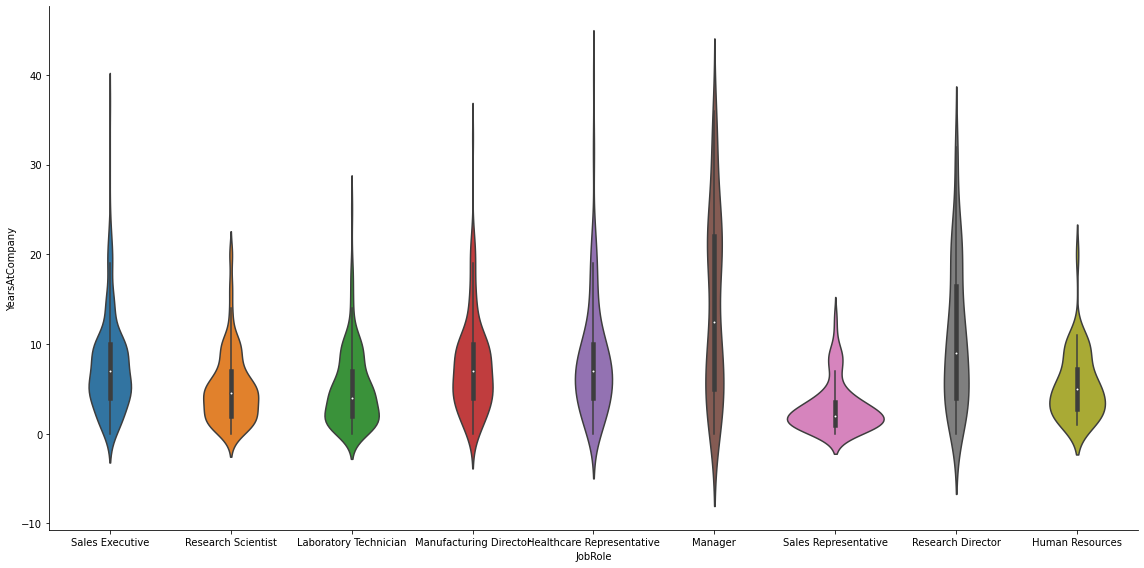

In [46]:
plt.figure(figsize=(15,6), facecolor='white')
sns.catplot(data = data, x = 'JobRole', y = 'YearsAtCompany',kind = 'violin', aspect = 2, height=8)
plt.show()

In [47]:
# Encoding Ordinal columns
from sklearn.preprocessing import OrdinalEncoder
ordi = OrdinalEncoder()
def ordinal_encode(data, col):
    data[col] = ordi.fit_transform(data[col])
    return data

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
data=ordinal_encode(data, oe_col)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   int32  
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

# Checking Outliers

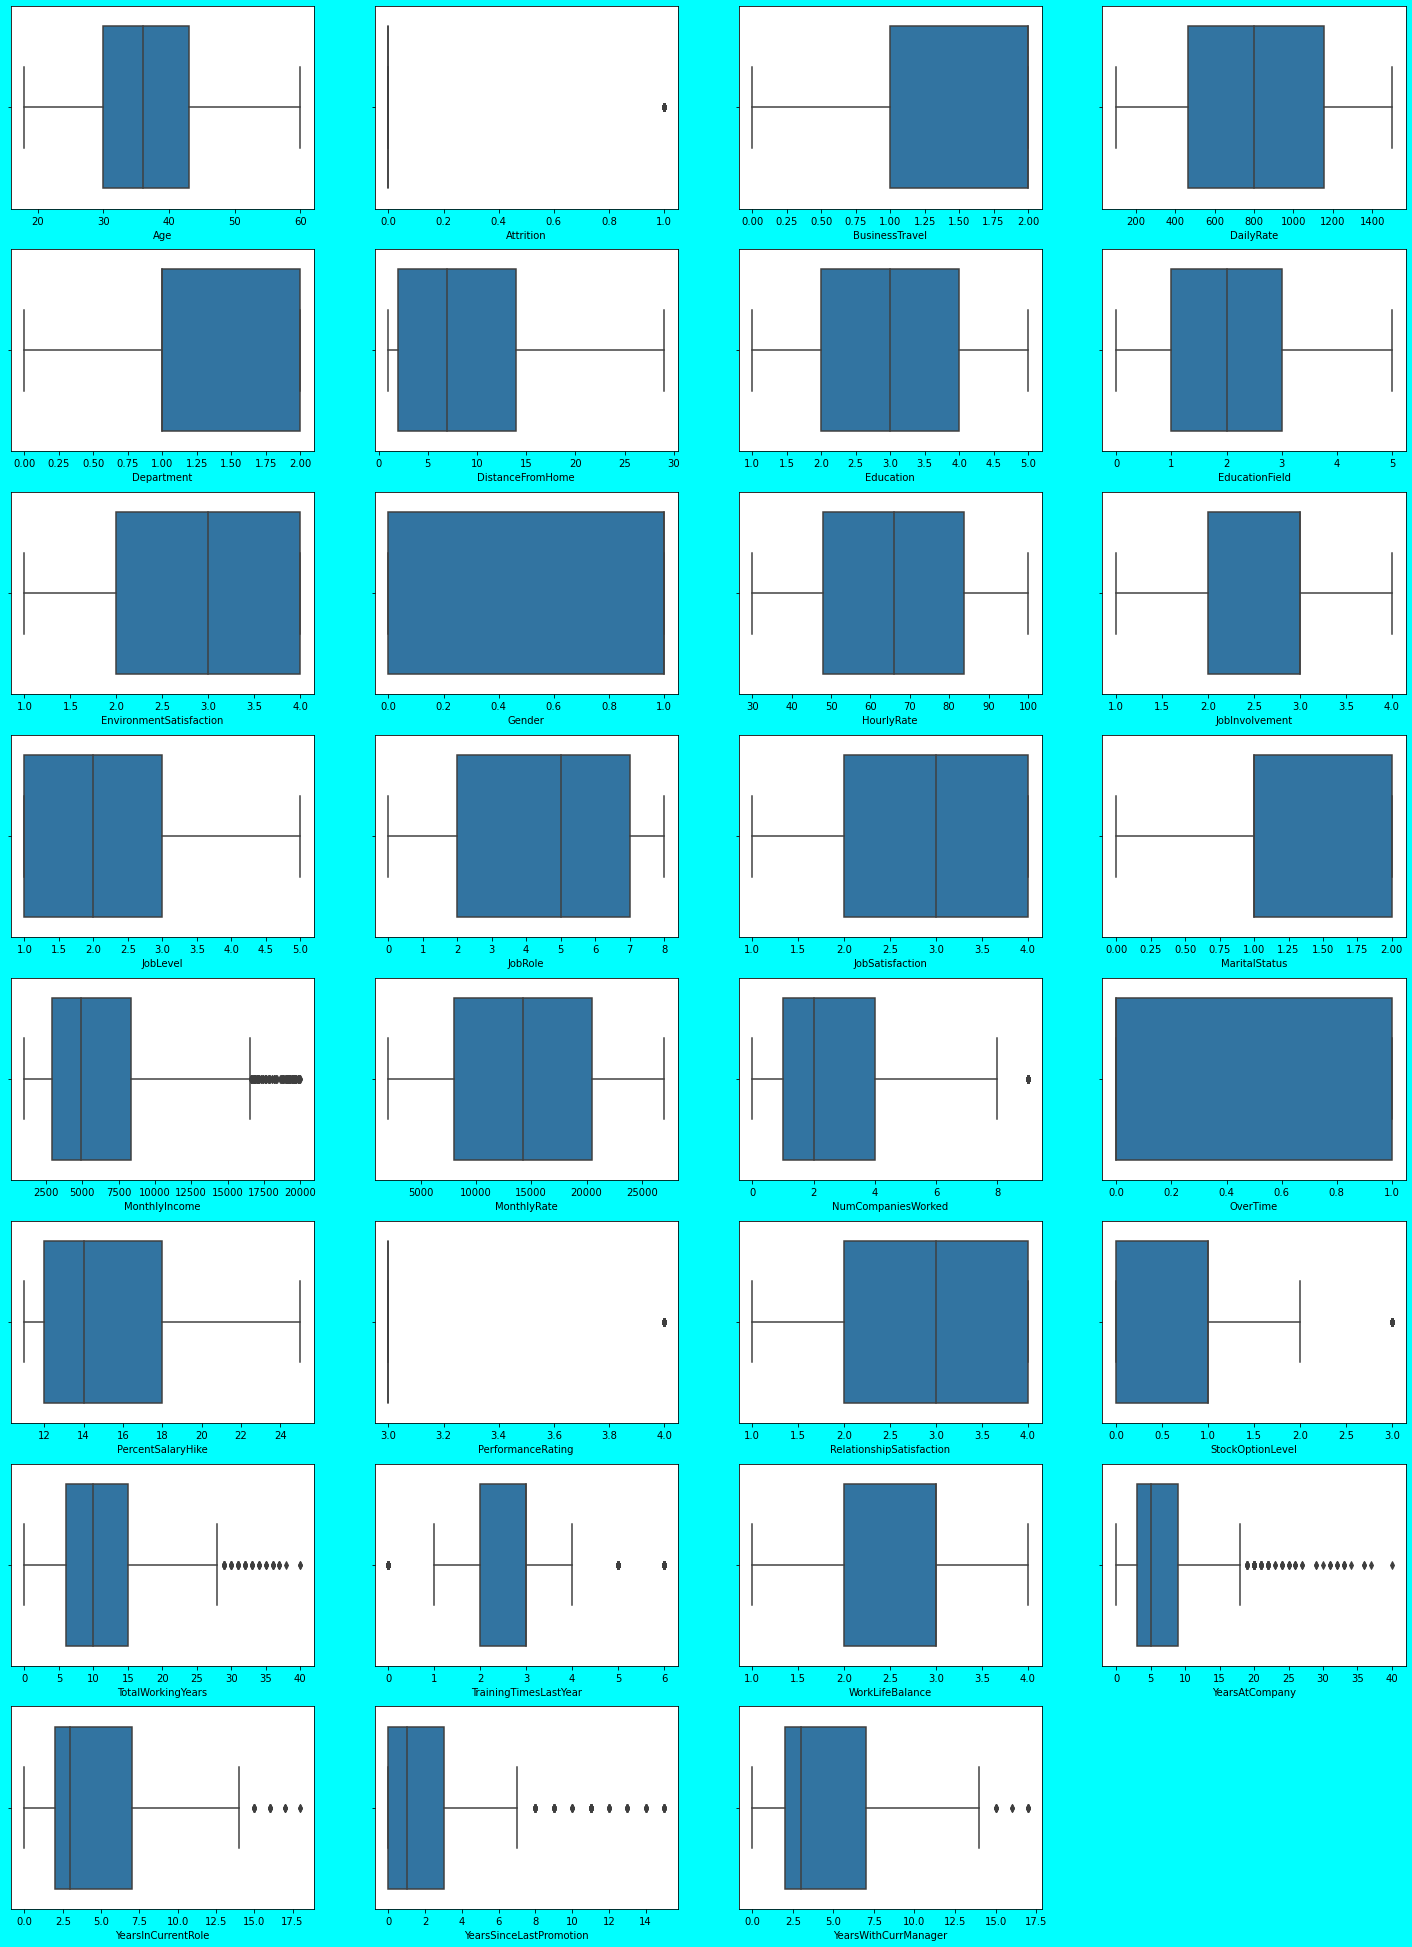

In [49]:
plt.figure(figsize=(25,35),facecolor='cyan')
plotnumber=1

for x in data:
    if plotnumber<=36:
        ax=plt.subplot(8,4,plotnumber)
        sns.boxplot(data[x])
        plt.xlabel(x)
    plotnumber+=1
plt.show()

We can see that there is outliers in the columns

# Removing Outliers

In [50]:
# Using ZScore Method
z = np.abs(zscore(data))
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [51]:
n_data = data[(z<3).all(axis = 1)]
n_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In [52]:
n_data.shape

(1387, 31)

# loss of data
1470-1387=83

# Correlation Matrix

In [53]:
n_data.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159366,0.022340,0.021946,-0.038242,-0.011265,0.198502,-0.032676,0.014098,-0.039430,...,-0.000617,0.041744,0.054506,0.636136,-0.019008,-0.016913,0.177620,0.121508,0.103632,0.121747
Attrition,-0.159366,1.000000,-0.001041,-0.057220,0.063637,0.081788,-0.032703,0.023585,-0.112393,0.036252,...,0.010781,-0.052344,-0.136676,-0.185619,-0.057285,-0.062492,-0.166455,-0.171015,-0.029263,-0.162297
BusinessTravel,0.022340,-0.001041,1.000000,-0.004606,-0.003521,-0.032873,-0.010560,0.022576,0.001183,-0.025364,...,-0.018274,-0.029660,-0.015159,0.029818,0.010322,-0.014140,-0.027164,-0.029257,-0.027283,-0.044321
DailyRate,0.021946,-0.057220,-0.004606,1.000000,-0.005398,-0.008171,-0.018442,0.040645,0.033123,-0.005242,...,0.000574,0.004516,0.048361,0.046173,0.005861,-0.044266,-0.003580,0.022899,-0.043870,-0.011516
Department,-0.038242,0.063637,-0.003521,-0.005398,1.000000,0.023919,0.012846,0.013432,-0.014540,-0.030618,...,-0.039364,-0.037705,-0.003424,-0.016246,0.036092,0.026978,0.032583,0.065536,0.048931,0.034216
DistanceFromHome,-0.011265,0.081788,-0.032873,-0.008171,0.023919,1.000000,0.001084,0.005882,-0.019279,-0.000819,...,0.023678,0.007885,0.049976,-0.001092,-0.034386,-0.034398,0.011579,0.019039,0.006635,-0.000221
Education,0.198502,-0.032703,-0.010560,-0.018442,0.012846,0.001084,1.000000,-0.038017,-0.026223,-0.019166,...,-0.023487,-0.002393,0.028494,0.125613,-0.026879,0.007844,0.033313,0.058007,0.042517,0.031210
EducationField,-0.032676,0.023585,0.022576,0.040645,0.013432,0.005882,-0.038017,1.000000,0.047924,0.010676,...,-0.003621,-0.013734,-0.015355,-0.012375,0.050502,0.034038,-0.012950,-0.010614,0.034094,0.013437
EnvironmentSatisfaction,0.014098,-0.112393,0.001183,0.033123,-0.014540,-0.019279,-0.026223,0.047924,1.000000,-0.015715,...,-0.025299,0.018414,0.013330,-0.001669,-0.019318,0.032492,0.006621,0.038837,0.027943,0.001606
Gender,-0.039430,0.036252,-0.025364,-0.005242,-0.030618,-0.000819,-0.019166,0.010676,-0.015715,1.000000,...,-0.010757,0.041458,0.026438,-0.058555,-0.040211,0.000134,-0.045123,-0.025536,-0.028162,-0.036280


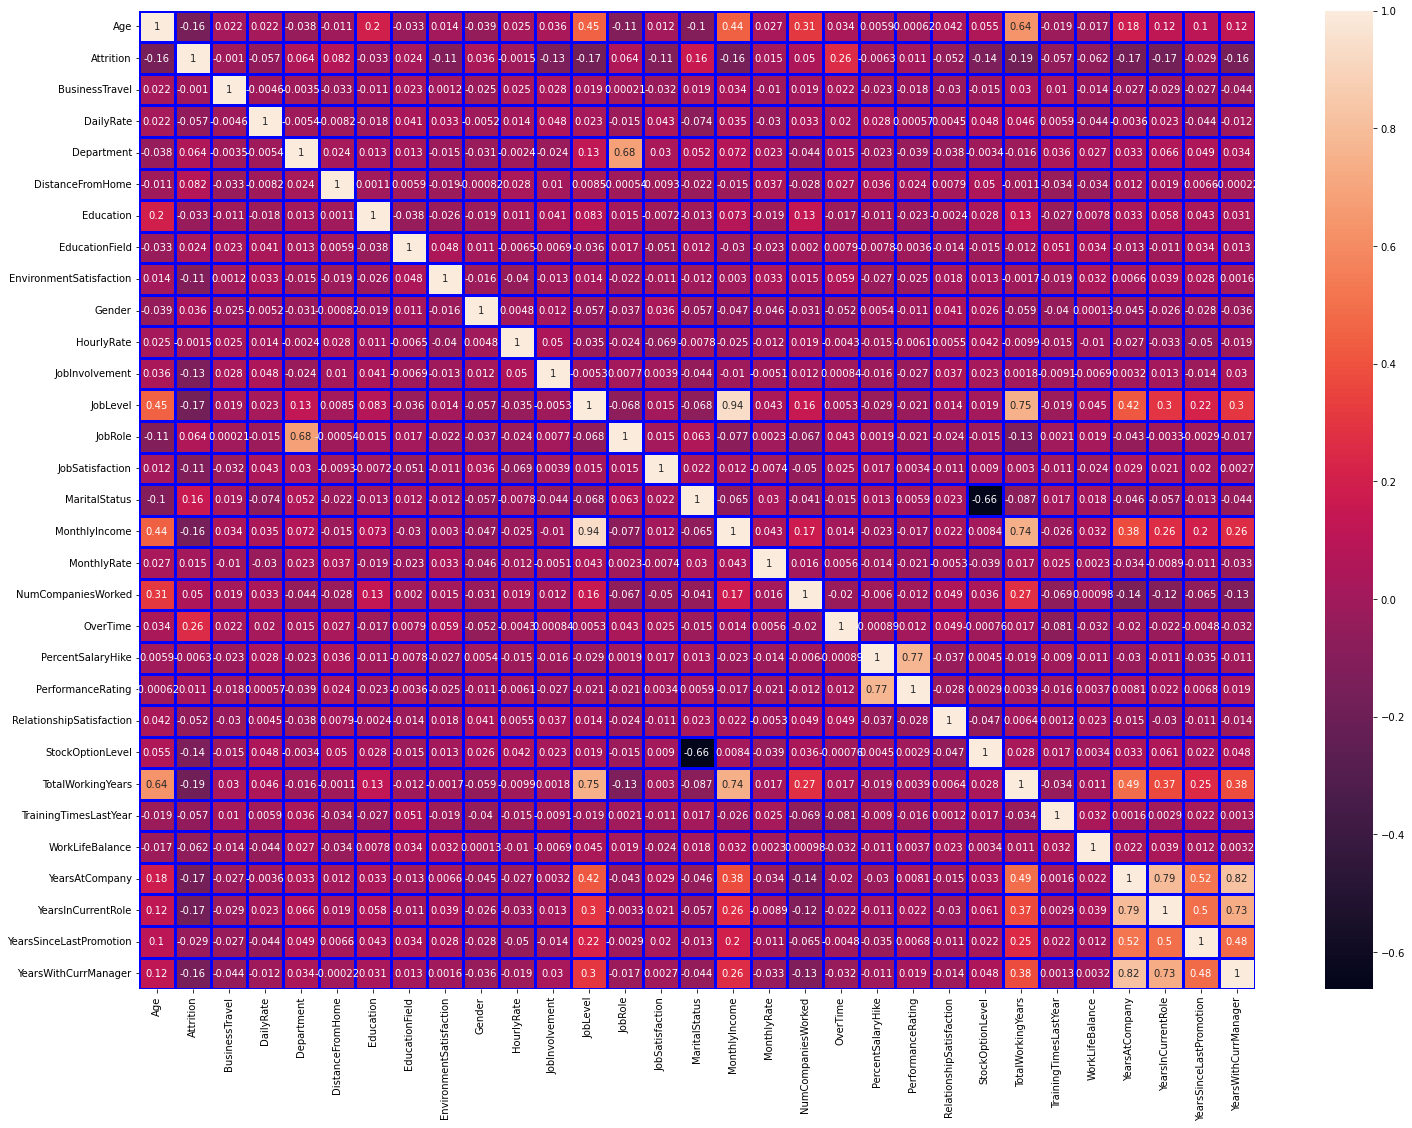

In [54]:
plt.subplots(figsize=(25,18))
sns.heatmap(n_data.corr(), annot= True, linecolor= "blue",  linewidths= 3)
plt.show()

This heat map contains both positive and negative correlation.

We can see that the target variable "Attrition" has very less correlation with the feature columns.

The columns BussinessTravel and HourlyRate have no relation with the target so we can drop these columns.

The only columns StockOptionLevel and MaritalStatus have correlation with each other. Apart from this here is no multicollinearity problem, so no need to worry much.

# Checking Skewness 

In [55]:
n_data.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [56]:
# Separating Target and features 
x = n_data.drop(['Attrition'], axis =1)
y = n_data['Attrition']

Removing skew data using power transform:

In [57]:
from sklearn.preprocessing import power_transform
n_data = power_transform(x)
n_data = pd.DataFrame(n_data, columns=x.columns)

# Balancing dataset

In [58]:
# Using SMOTE Method
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [59]:
y.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

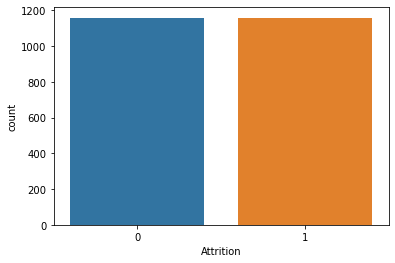

In [60]:
# After Balancing
sns.countplot(y)

we can see now data is equally distributed or balanced.

# Scaling

Using PCA

In [61]:
# Standarization of data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scale= scaler.fit_transform(x)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.000000,1102,2.000000,1,2,1.000000,2,0.000000,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1.000000,279,1.000000,8,1,1.000000,3,1.000000,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2.000000,1373,1.000000,2,2,4.000000,4,1.000000,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1.000000,1392,1.000000,3,4,1.000000,4,0.000000,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2.000000,591,1.000000,2,1,3.000000,1,1.000000,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2311,29,1.000000,898,1.000000,11,3,1.878055,3,0.439027,62,...,3,2,0,3,3,3,1,0,1,0
2312,26,1.975879,137,1.000000,16,3,1.000000,3,0.000000,50,...,3,3,0,7,2,2,7,2,6,6
2313,30,0.302028,1063,1.000000,13,3,3.791886,3,0.697972,75,...,3,2,1,5,2,3,5,2,2,0
2314,47,2.000000,1288,0.839868,10,2,2.160132,1,1.000000,80,...,3,3,0,20,1,2,12,4,2,4


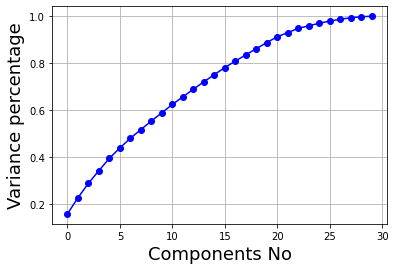

In [62]:
from sklearn.decomposition import PCA
pca = PCA()

#finding the principal components

x_pca = pca.fit_transform(x_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Components No', fontsize= 18)
plt.ylabel('Variance percentage', fontsize= 18)
plt.grid()
plt.show()

If the component value is 20 than the variance is greater than 90%.

In [63]:
pca_new = PCA(n_components=20)
x_scale_new = pca_new.fit_transform(x_scale)
x_scale_final= pd.DataFrame(x_scale_new)
x_scale_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.127539,-0.718177,-2.920309,0.127235,-0.631775,0.647321,-0.214291,-1.283681,0.564609,-2.905839,0.199417,1.552878,-0.391229,1.577182,1.216010,1.724717,0.182690,0.895445,-1.173824,1.418195
1,1.862524,-0.300349,2.632012,2.430105,-1.223746,0.498404,1.416683,0.560907,0.067220,1.691047,0.019024,-0.858664,-1.353861,-1.104259,1.485937,0.787116,0.315799,-0.971319,-0.604359,0.472121
2,-2.224027,1.225280,-0.287500,-0.332458,-0.616570,-2.353129,-2.308733,-0.943957,-0.896483,-0.788605,-0.696215,0.566059,-0.450930,-0.644918,0.606886,0.339936,0.548670,1.109619,1.562245,0.675264
3,0.062402,-0.581657,0.500220,-0.683142,1.228425,-0.750521,1.530655,-1.128442,0.692448,-1.511239,-0.562614,1.796643,1.122058,-0.599846,-0.248500,1.153914,-0.132159,-1.332613,0.755855,-0.874925
4,-1.134725,1.505112,-0.166528,-1.134915,0.639201,-0.978858,-0.617176,0.107616,0.529360,1.661979,1.427774,-0.830754,-0.508961,-1.303996,0.704838,0.592098,-1.841449,0.348388,-2.273180,0.543974


# Checking VIF Values

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_final= pd.DataFrame()
vif_final['VIF']= [variance_inflation_factor(x_scale_final.values,i) for i in range(x_scale_final.shape[1])]
vif_final['Top 20 Features']= x_scale_final.columns
vif_final

,VIF,Top 20 Features
0,1.0,0
1,1.0,1
2,1.0,2
3,1.0,3
4,1.0,4
5,1.0,5
6,1.0,6
7,1.0,7
8,1.0,8
9,1.0,9


None of the columns have the VIF value above 10 which means there is no multicollinearity issue.

# Model Selection

Finding best random state

In [65]:
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    model=RandomForestClassifier()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    acc=accuracy_score(y_test,predict)
    if acc>maxAcc:
        maxAccu=acc
        maxRS=i
print("Highest accuracy score ",maxAccu,"is seen with random state", maxRS)


Highest accuracy score  0.9179856115107914 is seen with random state 199


Best accuracy is 91%.

# Spliting Train and Test datasets

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.3, random_state=199)


# Logistic Regression

In [67]:
# Using Logistic Regression

Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)
y_pred = Log_reg.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(Log_reg,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.6701602959309494

 The CV score of Model : 0.6829110624543844

 The confusion Matrix :
  [[521 283]
 [252 566]]

 The classification report:
                precision    recall  f1-score   support

           0       0.67      0.65      0.66       804
           1       0.67      0.69      0.68       818

    accuracy                           0.67      1622
   macro avg       0.67      0.67      0.67      1622
weighted avg       0.67      0.67      0.67      1622


 roc_auc_score:  0.6699707452955272
*******************************************


Accuracy of logistic regression is 67% only.

# KNeighbours Classifier

In [68]:
# Using KNeighbour Classifier
from sklearn.neighbors import KNeighborsClassifier as KNN
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)
y_pred = knn_class.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(knn_class,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.6905055487053021

 The CV score of Model : 0.6585653216557189

 The confusion Matrix :
  [[461 343]
 [159 659]]

 The classification report:
                precision    recall  f1-score   support

           0       0.74      0.57      0.65       804
           1       0.66      0.81      0.72       818

    accuracy                           0.69      1622
   macro avg       0.70      0.69      0.69      1622
weighted avg       0.70      0.69      0.69      1622


 roc_auc_score:  0.6895032782298776
*******************************************


# Random Forest classifier

In [69]:
ran_class = RandomForestClassifier()
ran_class.fit(X_train, y_train)
y_pred = ran_class.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ran_class,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.906288532675709

 The CV score of Model : 0.9004900427484099

 The confusion Matrix :
  [[753  51]
 [101 717]]

 The classification report:
                precision    recall  f1-score   support

           0       0.88      0.94      0.91       804
           1       0.93      0.88      0.90       818

    accuracy                           0.91      1622
   macro avg       0.91      0.91      0.91      1622
weighted avg       0.91      0.91      0.91      1622


 roc_auc_score:  0.9065476407692589
*******************************************


# Adaboost Classifier

In [70]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(ada,X_train, y_train,cv=7)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.8933415536374846

 The CV score of Model : 0.8688023088023088

 The confusion Matrix :
  [[727  77]
 [ 96 722]]

 The classification report:
                precision    recall  f1-score   support

           0       0.88      0.90      0.89       804
           1       0.90      0.88      0.89       818

    accuracy                           0.89      1622
   macro avg       0.89      0.89      0.89      1622
weighted avg       0.89      0.89      0.89      1622


 roc_auc_score:  0.8934347212592294
*******************************************


# Decision Tree Classifier

In [73]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(dt,X_train, y_train,cv=7)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

******************RESULTS******************

 The accuracy score of Model : 0.811960542540074

 The CV score of Model : 0.7997546897546898

 The confusion Matrix :
  [[646 158]
 [147 671]]

 The classification report:
                precision    recall  f1-score   support

           0       0.81      0.80      0.81       804
           1       0.81      0.82      0.81       818

    accuracy                           0.81      1622
   macro avg       0.81      0.81      0.81      1622
weighted avg       0.81      0.81      0.81      1622


 roc_auc_score:  0.811887992798842
*******************************************


The maximum accuracy for this dataset we are getting in Random forest Classifier i.e. 91%

# Hyper Parameter Tunning

In [ ]:
# using Grid SearchCV

params = {  'bootstrap': [True], 'max_depth': [5, 7, 10, 12], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
RF_grid  = GridSearchCV(estimator=ran_class,param_grid=params, verbose=2, n_jobs=10, )
RF_grid.fit(X_train, y_train)

In [ ]:
y_pred = RF_grid.predict(X_test)

print("******************RESULTS******************")
print("\n The accuracy score of Model :", accuracy_score(y_test,y_pred))


CV=cross_val_score(RF_grid,X_train, y_train,cv=5)
print("\n The CV score of Model :", CV.mean())

print("\n The confusion Matrix :\n ", confusion_matrix(y_test, y_pred))
print("\n The classification report:\n ",classification_report(y_test, y_pred))
print("\n roc_auc_score: ",roc_auc_score(y_test,y_pred))
      
      
print("*******************************************")

After hyper parameter tunning we got the same  output value with Random Forest Classifier.

# Plotting ROC/AUC Curves

<Figure size 864x864 with 0 Axes>

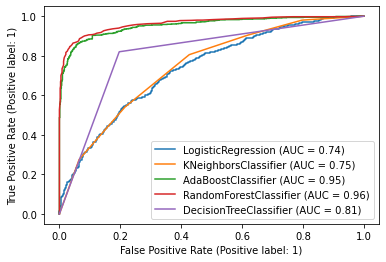

In [78]:
# Using ROC/AUC 
plt.figure(figsize=(12,12,))
graph = plot_roc_curve(Log_reg,X_test, y_test)
plot_roc_curve(knn_class,X_test, y_test, ax=graph.ax_)
plot_roc_curve(ada,X_test, y_test,ax=graph.ax_)
plot_roc_curve(ran_class,X_test, y_test,ax=graph.ax_)
plot_roc_curve(dt,X_test, y_test,ax=graph.ax_)
           
plt.show()

RandomForest Classifier has minimum variation in trainning and testing.
Random Forest Classifier model is best fit for this dataset.

# Saving Final Model

In [74]:
# Using Pickle
import pickle
pickle.dump(ran_class, open("HR_model", "wb"))
load_HR_model= pickle.load(open("HR_model", "rb"))


In [92]:
pred = load_HR_model.predict(x_test)
pred

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [91]:
pd.DataFrame([load_HR_model.predict(x_test)[:20],y_test[:20]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Predicted,0,1,1,1,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,1
Original,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,1,1,1
